In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
image_path = "../outputs/img/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

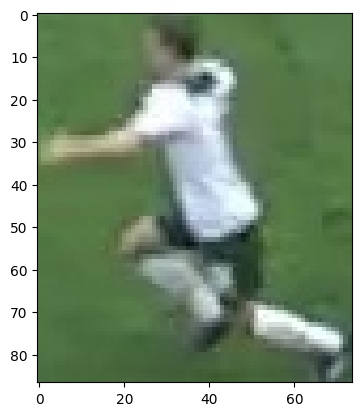

In [9]:
plt.imshow(image)
plt.show()

# Take the top half of the image

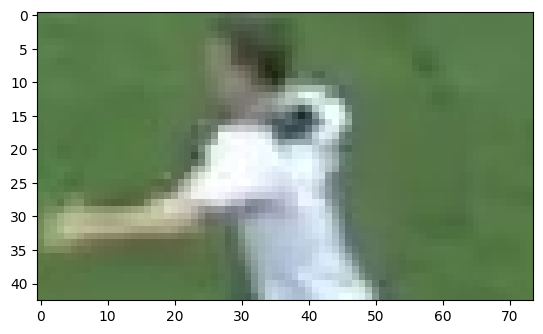

In [10]:
top_half_image = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half_image)

# Cluster the image into two clusters

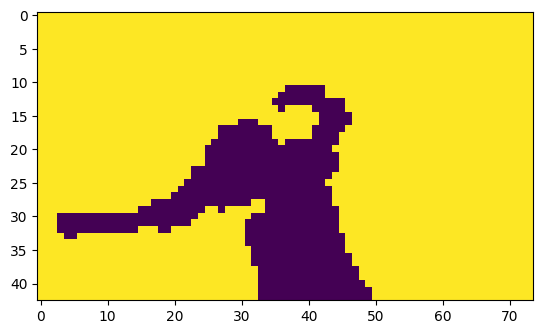

In [14]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)

In [15]:
corner_cluster = [clustered_image[0,0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print(non_player_cluster)

1


In [16]:
player_custer = 1-non_player_cluster
print(player_custer)

0


In [17]:
kmeans.cluster_centers_[player_custer]

array([198.13153153, 209.41621622, 211.21621622])